<a href="https://colab.research.google.com/github/ipanditi/ML/blob/main/CNN0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

#load the fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

#normalize the pixel values
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
#DEfine the model without Convolutions and pooling
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
#Setup training params
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

#Train
print(f'\nMODEL TRAINING:')
model.fit(train_images, train_labels, epochs = 5)

#Evaluate/test
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4932 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3767 - accuracy: 0.8636
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3375 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3122 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.8914

MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.3549 - accuracy: 0.8748


In [ ]:
#We can see that the loss is 0.3549 on test data and accuracy is around 88 %
#This is the result without using convolutions and pooling layers to reduce the images' pixels to the required features
#That is this is the brute force approach, thus now we use CNN and compare the results with the brute force technique


#Define CNN model
model = tf.keras.models.Sequential([
    #Add conv2D layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),

    #Pooling2D layer
    tf.keras.layers.MaxPooling2D(2,2),

    #Another pair of Conv2D and Pooling layers
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #Another...
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),

    #Add flatten and Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Print the model's summary
model.summary()

#Use same settings for the rest
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#Train
print(f'\nMODEL TRAINING:')
model.fit(train_images, train_labels, epochs=5)

#Test
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [ ]:
# We can clearly see that the data is overfit: 96% on train; 90% on test
#Another convolution => 90% on train; 88% on test
#Only one convolution => 94% on train and 91% on test
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


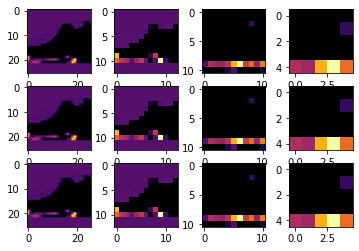

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE = 23
THIRD_IMAGE= 28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0,:,:, CONVOLUTION_NUMBER],cmap='inferno')
  axarr[0,x].grid(False)

  f2 =  activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0,:,:, CONVOLUTION_NUMBER],cmap='inferno')
  axarr[1,x].grid(False)

  f3 =  activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0,:,:, CONVOLUTION_NUMBER],cmap='inferno')
  axarr[2,x].grid(False)

In [ ]:
#It is indicating the heel/ sole

In [ ]:
#Exploring Convolutions
from scipy import misc

#load the ascent image
ascent_image = misc.ascent()

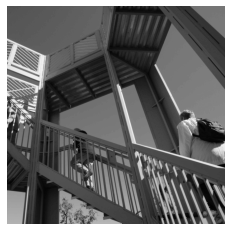

In [ ]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [ ]:
#The image is stored as a numpy array so you can create the transformed image by first copying that array. You can also get the dimensions of the image so you can loop over it later.
import numpy as np
image_transformed = np.copy(ascent_image)

#Get the dimensions of the image
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

In [ ]:
# Experiment with different values and see the effect
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [ ]:
#Create Convolutions
for x in range(1, size_x-1):
  for y in range(1, size_y-1):
    convolution = 0.0
    convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
    convolution = convolution + (ascent_image[x-1, y] * filter[0][1])
    convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])
    convolution = convolution + (ascent_image[x][y-1]* filter[1][0])
    convolution = convolution + (ascent_image[x][y]* filter[1][1])
    convolution = convolution + (ascent_image[x][y+1]*filter[1][2])
    convolution = convolution + (ascent_image[x+1][y-1]*filter[2][0])
    convolution = convolution + (ascent_image[x+1][y]*filter[2][1])
    convolution = convolution + (ascent_image[x+1][y+1]*filter[2][2])

    #Multiply by weight
    convolution = convolution*weight

    #Check the boundaries of the pixel values
    if(convolution<0):
      convolution=0
    if(convolution>255):
      convolution=255

    #Load into transformed image
    image_transformed[x,y] = convolution

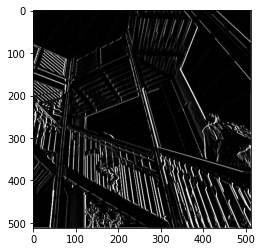

In [ ]:
#Plot the image to see the effect of convolution
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()

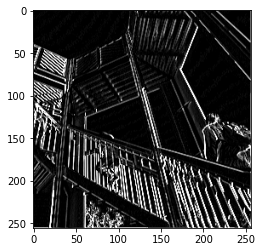

In [ ]:
#Max Pooling
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    
    # Store all the pixel values in the (2,2) pool
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])

    # Get only the largest value and assign to the reduced image
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()      




In [2]:
#an ImageDataGenerator can flow images from a directory and perform operations such as resizing them on the fly, the next thing to do is design the neural network to handle these more complex images. 
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-08-10 12:40:17--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.217.0.48, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   274MB/s    in 0.5s    

2022-08-10 12:40:18 (274 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [4]:
import zipfile

#Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [5]:
#Now the horse-or-human directory contains 2 subdirectories horses and humans
#The training set is the data used to tell the neural netowork model that 'thisi is what horse looks like and this is what a human looks like
#ImageDataGenerator automatically labels images according to the directory names and strucuture
import os

#Horse training
train_horse_dir = os.path.join('./horse-or-human/horses')

#Human training
train_human_dir = os.path.join('./horse-or-human/humans')

In [6]:
#Filenames
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse44-8.png', 'horse06-0.png', 'horse31-8.png', 'horse08-8.png', 'horse39-9.png', 'horse47-4.png', 'horse16-2.png', 'horse11-4.png', 'horse12-2.png', 'horse33-0.png']
['human05-25.png', 'human09-24.png', 'human16-17.png', 'human13-27.png', 'human04-28.png', 'human15-07.png', 'human02-18.png', 'human11-18.png', 'human07-22.png', 'human01-29.png']


In [7]:
#Number of images of each label
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Parameters for our graph; we'll output images in a 4*4 configuration 
nrows = 4
ncols = 4
#Index for iterating over images
pic_index = 0

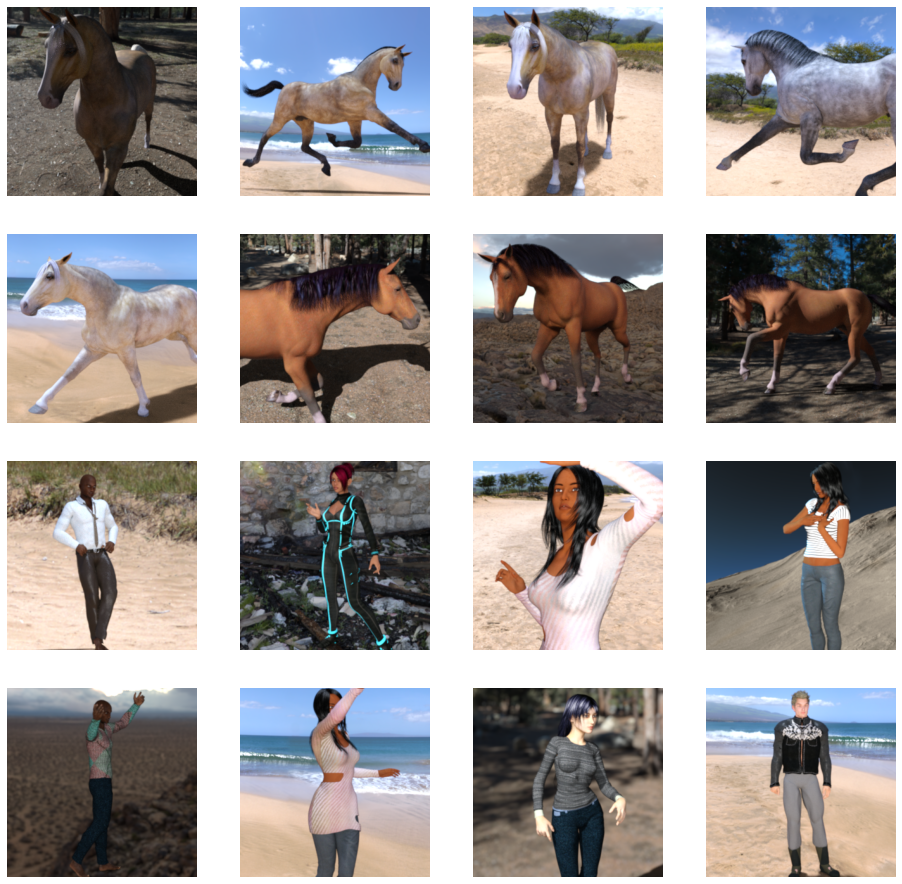

In [9]:
#Display a batch pf horses and humans, say 8 images
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  #Setup subplot
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [10]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    #First convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)), #300*300 pixels images with 3 colours RGB
    tf.keras.layers.MaxPooling2D(2,2),
    #Second Convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Flatten the reults to feed into a DNN
    tf.keras.layers.Flatten(),
    #512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Rescaling by 1/255
train_datagen= ImageDataGenerator(rescale=1/255)

#Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size = 128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 82s 10s/step - loss: 1.0741 - accuracy: 0.5239
Epoch 2/15
8/8 [==============================] - 92s 11s/step - loss: 0.6373 - accuracy: 0.6885
Epoch 3/15
8/8 [==============================] - 83s 10s/step - loss: 0.5316 - accuracy: 0.7330
Epoch 4/15
8/8 [==============================] - 102s 13s/step - loss: 0.5858 - accuracy: 0.7666
Epoch 5/15
8/8 [==============================] - 102s 12s/step - loss: 0.4008 - accuracy: 0.8298
Epoch 6/15
8/8 [==============================] - 90s 11s/step - loss: 0.3209 - accuracy: 0.8810
Epoch 7/15
8/8 [==============================] - 88s 11s/step - loss: 0.2295 - accuracy: 0.9055
Epoch 8/15
8/8 [==============================] - 107s 13s/step - loss: 0.1274 - accuracy: 0.9473
Epoch 9/15
8/8 [==============================] - 93s 11s/step - loss: 0.0942 - accuracy: 0.9644
Epoch 10/15
8/8 [==============================] - 92s 11s/step - loss: 0.1216 - accuracy: 0.9466
Epoch 11/15
8/8 [=========

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn+ "is a human")
  else:
    print(fn + "is a horse")

Saving images (2).jpg to images (2) (1).jpg
[0.9999995]
images (2).jpgis a human


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


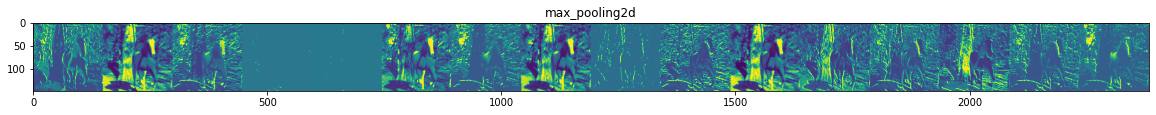

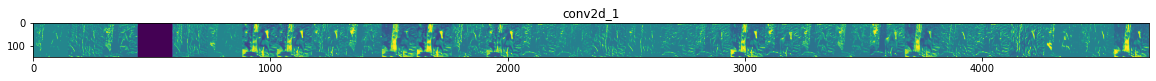

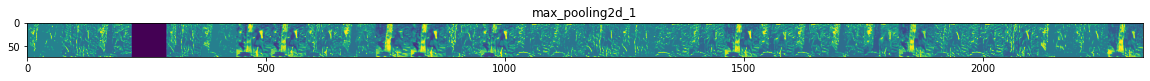

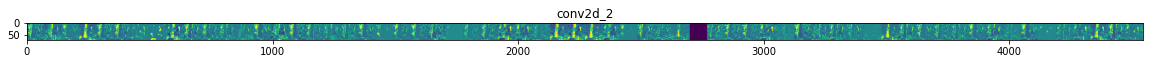

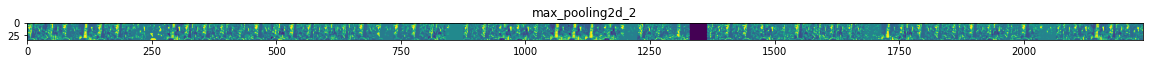

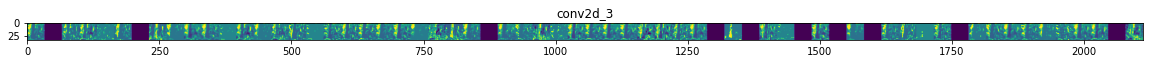

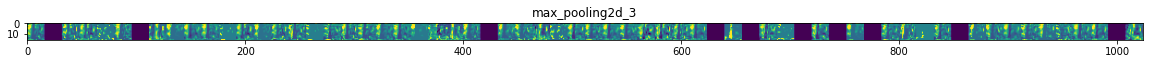

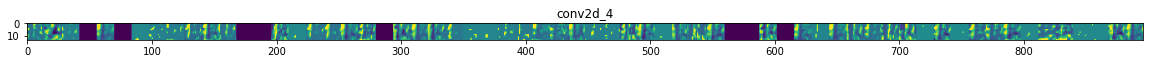

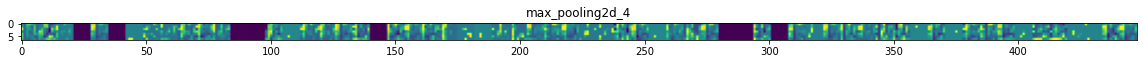

In [19]:
import numpy as np

import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model  = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f)for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f)for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size =(300, 300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /=255

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape)==4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size*n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x= np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i*size: (i+1)*size] = x
    scale = 20. /n_features
    plt.figure(figsize = (scale*n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap = 'viridis')

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)